In [1]:
# 라이브러리 불러오기   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# 데이터 불러오기
noc_region = pd.read_csv('./Data/noc_regions.csv')
athlete_events = pd.read_csv('./Data/athlete_events.csv')

In [2]:
#초기 데이터셋 탐색

# noc_region의 열과 행의 갯수 확인
print(noc_region.shape)

# ahtlete_events의 열과 행의 갯수 확인
print(athlete_events.shape)

# noc_region의 상위 5개 데이터 확인
print(noc_region.head())

# athlete_events의 상위 5개 데이터 확인
print(athlete_events.head())


(230, 3)
(271116, 15)
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  190

In [3]:
# 데이터 병합 outer join
all_data = pd.merge(athlete_events, noc_region, how='outer', on='NOC')

# 병합된 데이터 확인
print(all_data.head())

# all_data의 noc와 noc_region의 noc의 항목명 차집합 확인
print(set(all_data['NOC']) - set(noc_region['NOC']))

# 싱가포르의 NOC가 서로 다름을 확인함.

# athlete_events의 NOC 열의 SGP를 SIN으로 변경
athlete_events['NOC'] = athlete_events['NOC'].replace('SGP', 'SIN')

# 데이터 새로 병합해서 all_data에 저장
all_data = pd.merge(athlete_events, noc_region)

# region, notes 열 대문자로 변경
all_data.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

       ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1.0      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2.0       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602.0  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463.0      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464.0      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

     Year  Season            City       Sport  \
0  1992.0  Summer       Barcelona  Basketball   
1  2012.0  Summer          London        Judo   
2  2000.0  Summer          Sydney      Boxing   
3  2004.0  Summer          Athina   Wrestling   
4  2016.0  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Midd

In [4]:
# 중복치 갯수 확인
print(all_data.duplicated().sum())

# 중복치가 어디서 발생하는지 확인
print(all_data[all_data.duplicated()])

# 5540 부터 5543 행 자세히 출력
print(all_data[5540:5545])

# 중복치 제거
all_data = all_data.drop_duplicates()

# 중복치 제거 확인
print(f"total duplicates : {all_data.duplicated().sum()}")

1385
            ID                                  Name Sex   Age  Height  \
5478     12948                 Thyra Valborg Boldsen   F  48.0     NaN   
5540     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5541     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5542     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5543     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
...        ...                                   ...  ..   ...     ...   
249409  127869              Adolf Wagner von der Mhl   M  44.0     NaN   
259208   23363                            Frane Cota   M  25.0     NaN   
259986   64240                              F. Kroly   M   NaN     NaN   
260363   85115                      Franjo Neidhardt   M   NaN     NaN   
261198  122725                       Vladimir Turina   M  35.0     NaN   

        Weight        Team  NOC        Games  Year  Season         City  \
5478       NaN     Denmark  DEN

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region        21
Notes     264696
dtype: int64
            ID                Name Sex   Age  Height  Weight     Team  NOC  \
0            1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1            2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
2          602       Abudoureheman   M  22.0   182.0    75.0    China  CHN   
3         1463           Ai Linuer   M  25.0   160.0    62.0    China  CHN   
4         1464           Ai Yanhan   F  14.0   168.0    54.0    China  CHN   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
271111  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
271112  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES

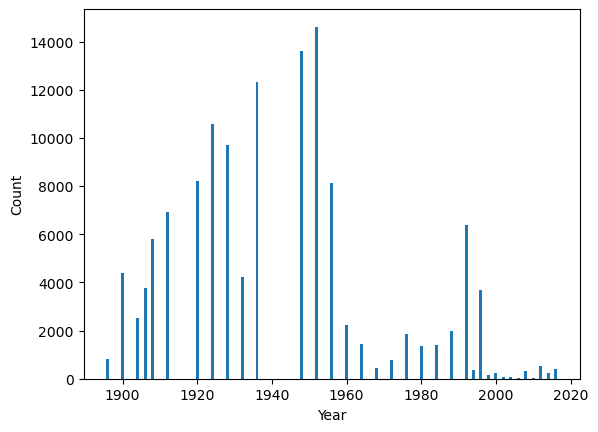

In [5]:
# 결측치 확인
print(all_data.isnull().sum())

# 결측치 있는 행들 확인
print(all_data[all_data.isnull().any(axis=1)])

# Region 결측치 확인
print(all_data[all_data['Region'].isnull()])

# Region 결측치 Team과 동일하게 채워넣기
all_data['Region'] = all_data['Region'].fillna(all_data['Team'])

# Medal 결측치 'No medal'로 채워넣기
all_data['Medal'] = all_data['Medal'].fillna('No medal')

# Notes 결측치 'No notes'로 채워넣기
all_data['Notes'] = all_data['Notes'].fillna('No notes')

# 각 행의 결측치 수를 확인하고 'miss_data' 열로 추가
all_data["miss_data"] = all_data.isnull().sum(axis=1)

# 년도별 결측치 총합 계산 후 내림차순 정렬
n_miss_data = all_data.groupby('Year')['miss_data'].sum().sort_values(ascending=False)

# 시각화
plt.bar(n_miss_data.index, n_miss_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


보다시피 결측치가 상당히 많음.
60년대 이전으로 많이 분포하고 있는데.
이를 버릴 수가 없었음. 중요한 데이터이기 때문에.
그리고 아예 비워져있는게 아니라 일부 데이터가 없는 것이라.
채워주면 된다고 생각함.
결측치를 채워줄 때, 옵션이 아래와 같았음.

중간값 혹은 평균값 대체
단점 =
회귀 대체
단점 = 선형적 표현으로 다양한 측면 고려가 어려움.
KNN
장점 = 데이터가 많고 또 비선형적인 패턴을 찾을 수 있기에 해당 문제를 해결하기에 최적의 옵션이라고 생각함.
  
결론적으로 KNN으로 결측치를 대체하기로함.
키, 몸무게, 나이끼리의 상관관계 뿐만 아니라. 국가와 종목까지 고려하여서.
이웃 최근접 값을 찾아 주었음.

물론 어디까지나 없는 값을 채워주는 것이기에.이것이 정확하다고 볼 수는 없을 것임.
그래도. 단순히 중간값으로 채워주는 것 보다는 좀 더 다채로운 특징을 살려준 채로 채우는거라.
차후 분석시에 조금 더 정확한 분석이 나올 것으로 예상되었음.

K값을 10으로 두어서 계산했고 약 13분 소요됨
K값이란, 결측치를 중심으로 인접한 속성 값을 몇 개까지 볼 것인가를 뜻함.

결과는 아래와 같음.
X축은 각각 나이, 몸무게, 키 이고, Y축은 연도로 설정하여 분포도를 나타냄

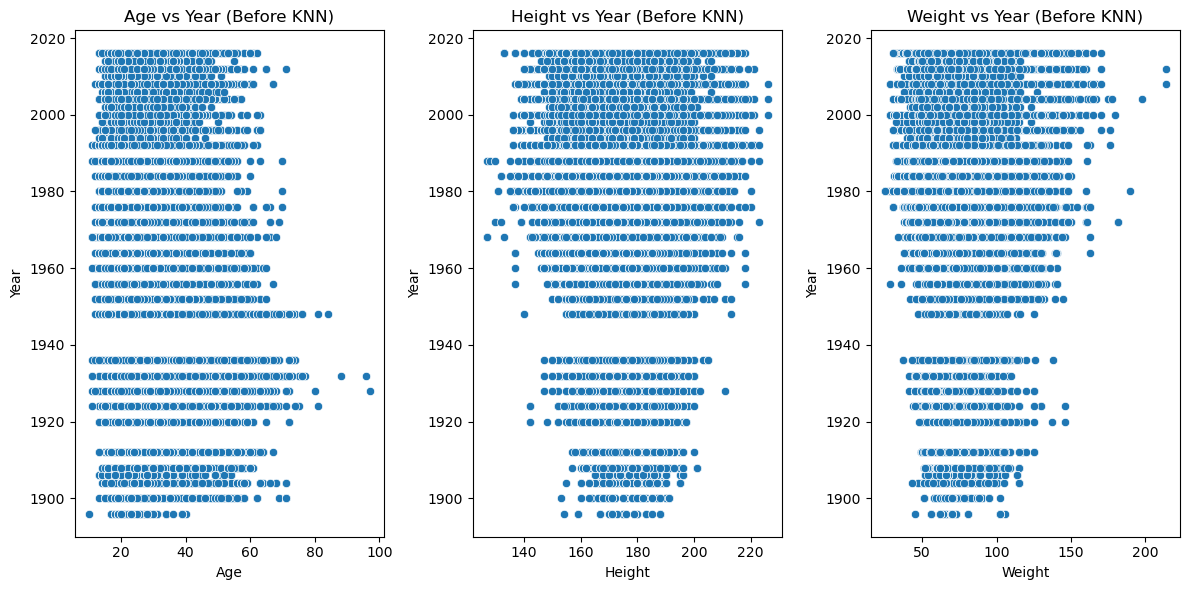

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# KNN 적용 전 분포도 시각화
plt.figure(figsize=(12, 6))

# Age vs Year 분포도
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data)
plt.title('Age vs Year (Before KNN)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data)
plt.title('Height vs Year (Before KNN)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data)
plt.title('Weight vs Year (Before KNN)')

plt.tight_layout()
plt.show()

# KNN모델 반영 전 결측치 추적
all_data['Age_was_missing'] = all_data['Age'].isnull()
all_data['Height_was_missing'] = all_data['Height'].isnull()
all_data['Weight_was_missing'] = all_data['Weight'].isnull()

In [7]:
# KNN Imputer 적용 코드
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# 'NOC' 열과 'Sport' 열을 Label Encoding으로 수치형 변환
le_noc = LabelEncoder()
all_data['NOC_encoded'] = le_noc.fit_transform(all_data['NOC'])

le_sport = LabelEncoder()
all_data['Sport_encoded'] = le_sport.fit_transform(all_data['Sport'])

# KNN을 적용할 열 목록 (국가와 종목 포함)
columns_to_impute = ['Age', 'Height', 'Weight', 'Sport_encoded', 'NOC_encoded']

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
all_data[columns_to_impute] = scaler.fit_transform(all_data[columns_to_impute])

# KNNImputer로 결측치 대체
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

# 스케일링을 원래대로 되돌림
all_data[columns_to_impute] = scaler.inverse_transform(all_data[columns_to_impute])

# 결측치가 잘 채워졌는지 확인
print(all_data.isnull().sum())
columns_to_impute = ['Age', 'Height', 'Weight']
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal                 0
Region                0
Notes                 0
miss_data             0
Age_was_missing       0
Height_was_missing    0
Weight_was_missing    0
NOC_encoded           0
Sport_encoded         0
dtype: int64


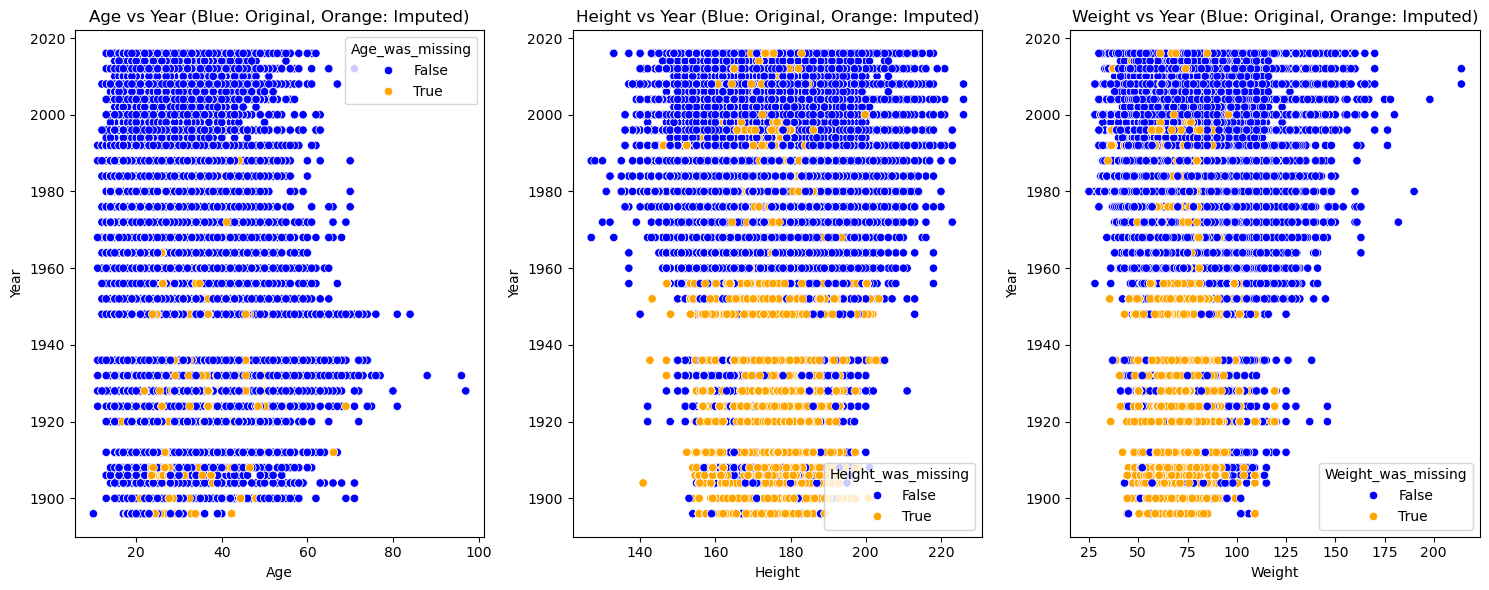

In [8]:
# KNN 적용 후 분포도 시각화
plt.figure(figsize=(15, 6))

# Age vs Year 분포도 (KNN 적용 후, 결측치 채워진 부분 추적)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data, hue='Age_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Age vs Year (Blue: Original, Orange: Imputed)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Height vs Year (Blue: Original, Orange: Imputed)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Weight vs Year (Blue: Original, Orange: Imputed)')

plt.tight_layout()
plt.show()

In [88]:
# 데이터 프레임 저장
all_data.to_csv('./Data/cleaned_all_data.csv', index=False)

이제 깨끗히 정리된 데이터가 준비되었으니. 
기본적인 분석을 진행 해보자
- 기본적 분석

In [89]:
# 라이브러리 불러오기   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# all data에 cleaned_all data.csv 파일을 저장함
all_data = pd.read_csv('./Data/cleaned_all_data.csv')

In [90]:
# 올림픽에 참여한 총 선수 수
althlete_count = all_data['Name'].nunique()
print(f"Total number of athletes: {althlete_count}")

Total number of athletes: 134732


In [91]:
# 남성과 여성 선수 수
male_count = all_data[all_data['Sex'] == 'M']['Name'].nunique()
female_count = all_data[all_data['Sex'] == 'F']['Name'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of male athletes: 100979
Total number of female athletes: 33808


134,732 / 134,787
?? 차이가 발생하네 동명이인이라도 있나.


In [104]:
# 선수의 고유한 수를 이름, 성별, 국가 조합으로 계산
athlete_count = all_data[['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (이름, 성별, 국가 조합 기준)
male_count = all_data[all_data['Sex'] == 'M'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
female_count = all_data[all_data['Sex'] == 'F'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

# 전체 데이터에서 ID 열의 개수 출력
total_ids = all_data['ID'].count()
print(f"Total number of IDs: {total_ids}")

Total number of athletes: 136657
Total number of male athletes: 102337
Total number of female athletes: 34320
Total number of IDs: 269731


136,657?? 왜 이렇게 나오지

문제점을 찾음. 동명이인도 있는데, 같은 선수가 여러번 출전한 것도 고려를 해야함.  
고유 ID가 있는 줄 모르고 바보같이 했네.
  
135,571(고유 ID 수) - 134,732(고유 이름 수) = 839 (동명이인 수)  
136,657이 나온 이유는 같은 선수가 여러번 출전한 것임  

In [92]:
# 고유한 선수 데이터 추출
unique_athletes = all_data.drop_duplicates(subset=['ID'])

# 고유한 선수 수 계산
athlete_count = unique_athletes['ID'].nunique()
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (ID 기준)
male_count = unique_athletes[unique_athletes['Sex'] == 'M']['ID'].nunique()
female_count = unique_athletes[unique_athletes['Sex'] == 'F']['ID'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of athletes: 135571
Total number of male athletes: 101590
Total number of female athletes: 33981


고유 ID기준으로 정확한 총 선수 수는 다음과 같음.

총 선수 수 : 13만 5,571명  

남자 선수 수 : 10만 1,590명  
여자 선수 수 : 3만 3,981명  

그럼 이제 성비를 한번 보겠음.  

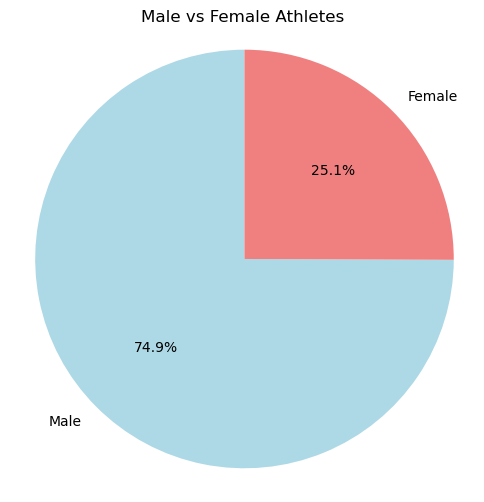

In [93]:
# Pie chart 시각화

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Male vs Female Athletes")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

남녀 성비는 전체적으로 4분의 1비율인듯

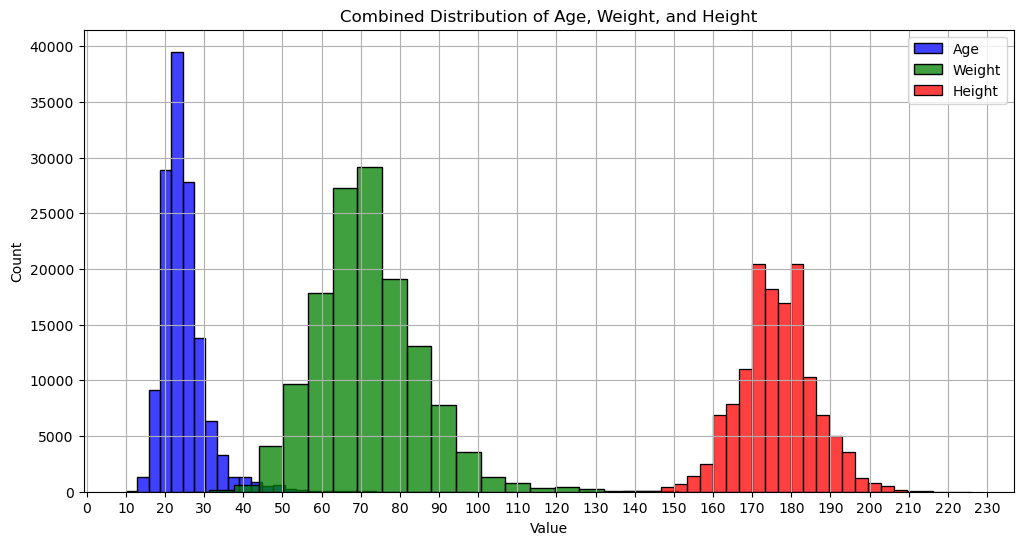

         mean   std    min    25%    50%    75%    max
Age      24.6   5.8   10.0   21.0   24.0   27.0   97.0
Height  176.2   9.6  127.0  170.0  176.0  182.1  226.0
Weight   71.9  13.3   25.0   63.0   71.0   79.7  214.0


In [94]:
# 체중, 신장, 나이 분포도 시각화
plt.figure(figsize=(12, 6))
sns.histplot(unique_athletes['Age'], bins=30, kde=False, label='Age', color='blue')
sns.histplot(unique_athletes['Weight'], bins=30, kde=False, label='Weight', color='green')
sns.histplot(unique_athletes['Height'], bins=30, kde=False, label='Height', color='red')

# 제목과 레이블 설정
plt.title('Combined Distribution of Age, Weight, and Height')
plt.xlabel('Value')
plt.ylabel('Count')

# x축 눈금을 10 단위로 설정
plt.xticks(range(0, int(max(all_data[['Age', 'Weight', 'Height']].max())) + 10, 10))

# 범례 추가
plt.legend()

# 플롯 표시
plt.grid()
plt.show()

# 데이터 description 나이 신장 체중 소수점 한자리까지 출력
print(unique_athletes[['Age', 'Height', 'Weight']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(1))

No medal    229959
Gold         13369
Bronze       13295
Silver       13108
Name: Medal, dtype: int64


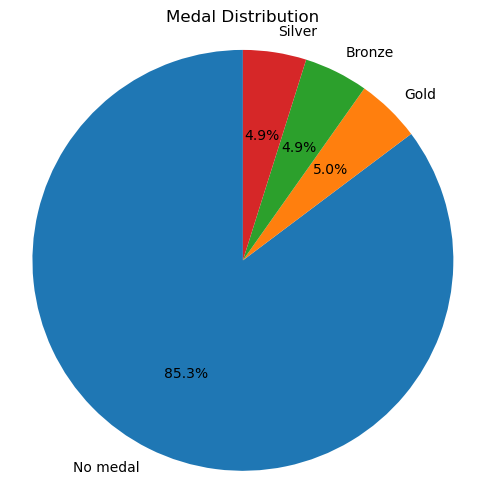

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Medal, dtype: int64


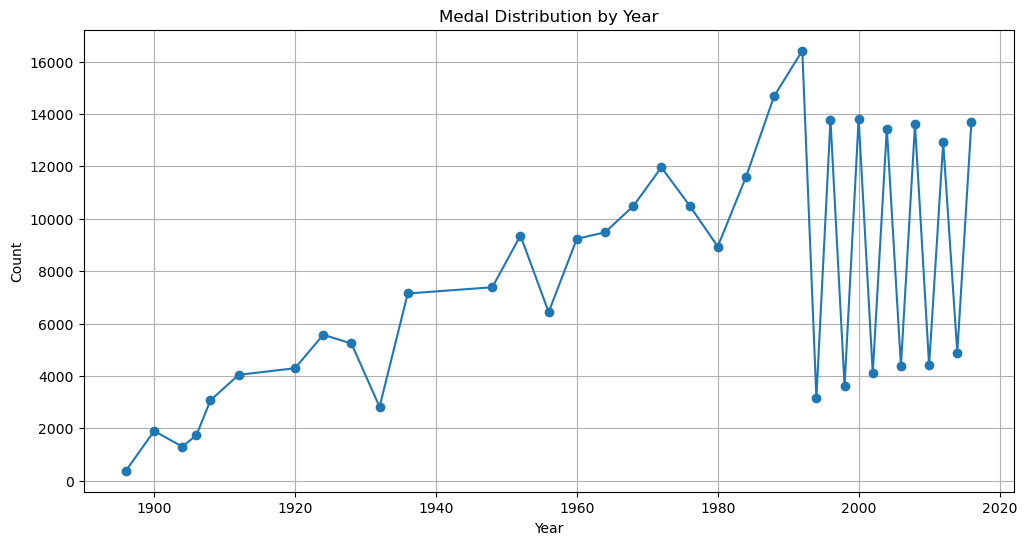

In [95]:
# 전체 메달 수 계산 및 시각화 no medal 포함
medal_count = all_data['Medal'].value_counts()
print(medal_count)

# 메달 수 시각화
plt.figure(figsize=(6, 6))
plt.pie(medal_count, labels=medal_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Medal Distribution")
plt.axis('equal')
plt.show()

# 년도 별 메달 수 계산
medal_count_by_year = all_data.groupby('Year')['Medal'].count()
print(medal_count_by_year)

# 년도 별 메달 수 시각화
plt.figure(figsize=(12, 6))
plt.plot(medal_count_by_year.index, medal_count_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Medal Distribution by Year')
plt.grid()
plt.show()


In [96]:
#  올림픽이 개최된 연도 내림차순으로 정렬
unique_years = all_data['Year'].unique()
unique_years = np.sort(unique_years)
unique_years = unique_years[::-1]

# 역대 올림픽 개최 년도 출력
print("List of Olympic years")
print(unique_years)

print("")

# 올림픽 스포츠 종목
sports = all_data['Sport'].unique()
print("List of Olympic sports")
print(sports)

List of Olympic years
[2016 2014 2012 2010 2008 2006 2004 2002 2000 1998 1996 1994 1992 1988
 1984 1980 1976 1972 1968 1964 1960 1956 1952 1948 1936 1932 1928 1924
 1920 1912 1908 1906 1904 1900 1896]

List of Olympic sports
['Basketball' 'Judo' 'Boxing' 'Wrestling' 'Swimming' 'Speed Skating'
 'Short Track Speed Skating' 'Softball' 'Hockey' 'Curling' 'Archery'
 'Triathlon' 'Football' 'Rhythmic Gymnastics' 'Athletics' 'Badminton'
 'Fencing' 'Figure Skating' 'Gymnastics' 'Volleyball' 'Baseball'
 'Water Polo' 'Snowboarding' 'Shooting' 'Weightlifting' 'Cycling' 'Rowing'
 'Sailing' 'Diving' 'Modern Pentathlon' 'Art Competitions'
 'Synchronized Swimming' 'Handball' 'Canoeing' 'Cross Country Skiing'
 'Table Tennis' 'Ice Hockey' 'Tennis' 'Taekwondo' 'Freestyle Skiing'
 'Beach Volleyball' 'Trampolining' 'Alpine Skiing' 'Golf' 'Biathlon'
 'Equestrianism' 'Ski Jumping' 'Tug-Of-War' 'Bobsleigh' 'Nordic Combined'
 'Polo' 'Skeleton' 'Rugby Sevens' 'Luge' 'Roque' 'Rugby' 'Lacrosse'
 'Jeu De Paume' 'M

In [97]:
# 전체 국가(NOC) 리스트 출력
unique_countries = all_data['NOC'].unique()
print(f"Total number of countries: {len(unique_countries)}")
print(unique_countries)

# 올림픽에 참여한 Region 리스트
unique_regions = all_data['Region'].unique()
print(f"Total number of regions: {len(unique_regions)}")
print(unique_regions)

# 올림픽에 참가한 도시들과 그 수
city_count = all_data['City'].nunique()
print(f"Total number of cities: {city_count}")
print(all_data['City'].unique())

Total number of countries: 230
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SIN' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' '

In [98]:
# 국가별 메달 수 계산 (금, 은, 동 순서 및 합산)
medal_count = all_data.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count['Total'] = medal_count.sum(axis=1)
medal_count = medal_count.sort_values(by='Total', ascending=False)
print(medal_count.head())

Medal  Bronze  Gold  No medal  Silver  Total
NOC                                         
USA      1358  2638     12967    1641  18604
FRA       666   499     10784     602  12551
GBR       651   677     10048     739  12115
ITA       531   575      9031     531  10668
GER       746   745      7569     674   9734


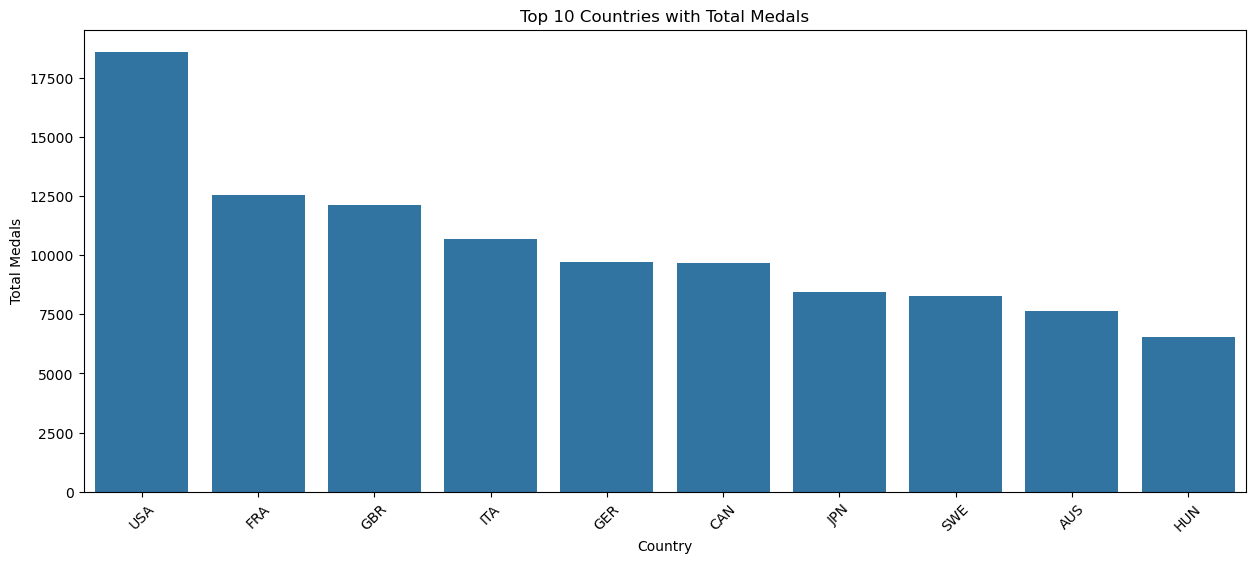

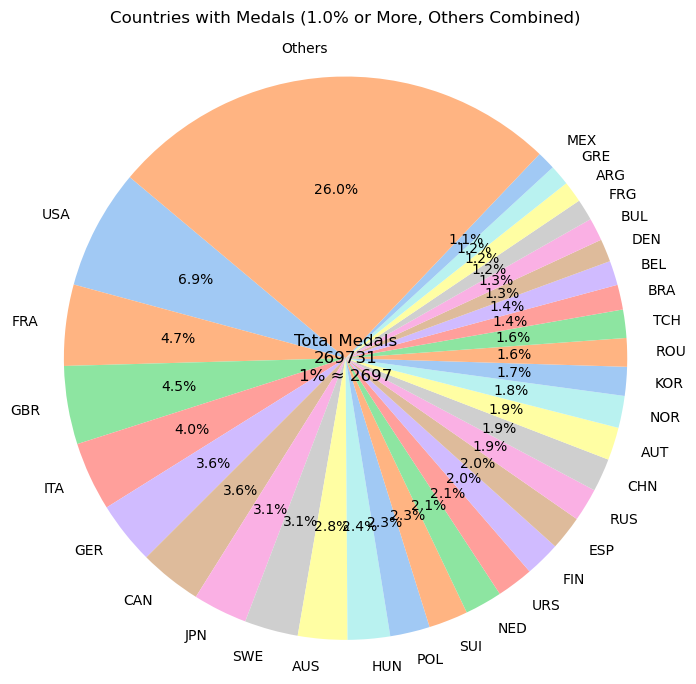

In [99]:
# Top 10 국가별 메달 수 시각화 (막대 그래프)
top_10_medal_count = medal_count.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_medal_count.index, y=top_10_medal_count['Total'], width=0.8)  # 막대폭을 줄여 가독성 향상
plt.title("Top 10 Countries with Total Medals")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)  # x축 레이블을 45도로 회전해 가독성 개선
plt.show()

# 전체 메달 수 계산
total_medals = medal_count['Total'].sum()

# 각 국가의 메달 비율 계산
medal_count['Percentage'] = (medal_count['Total'] / total_medals) * 100

# 차지 비율이 1% 이상인 국가만 포함 (1.0% 포함, 0.9% 제외)
above_threshold = medal_count[medal_count['Percentage'] >= 1.0]  # 1.0% 이상인 국가
below_threshold_sum = medal_count[medal_count['Percentage'] < 1.0]['Total'].sum()  # 1.0% 미만 국가의 메달 합산

# "Others"로 추가
final_medal_count = above_threshold['Total'].append(pd.Series(below_threshold_sum, index=['Others']))

# 파이 차트 시각화
plt.figure(figsize=(8, 8))

# 파이 차트 그리기
plt.pie(final_medal_count, labels=final_medal_count.index, autopct=autopct_func, startangle=140, colors=sns.color_palette("pastel"))

# 파이 차트 중앙에 전체 메달 수와 1%에 해당하는 메달 수 표시
one_percent_medals = total_medals * 0.01  # 1%에 해당하는 메달 수
plt.text(0, 0, f"Total Medals\n{total_medals}\n1% ≈ {int(one_percent_medals)}", ha='center', va='center', fontsize=12, color='black')

# 제목과 차트 사이의 간격 추가 (pad=20으로 설정하여 간격을 벌림)
plt.title(f"Countries with Medals (1.0% or More, Others Combined)", pad=20)

plt.axis('equal')  # 원형이 찌그러지지 않게 함
plt.show()

1984년대 이후 각 국가별 메달 수 추이.

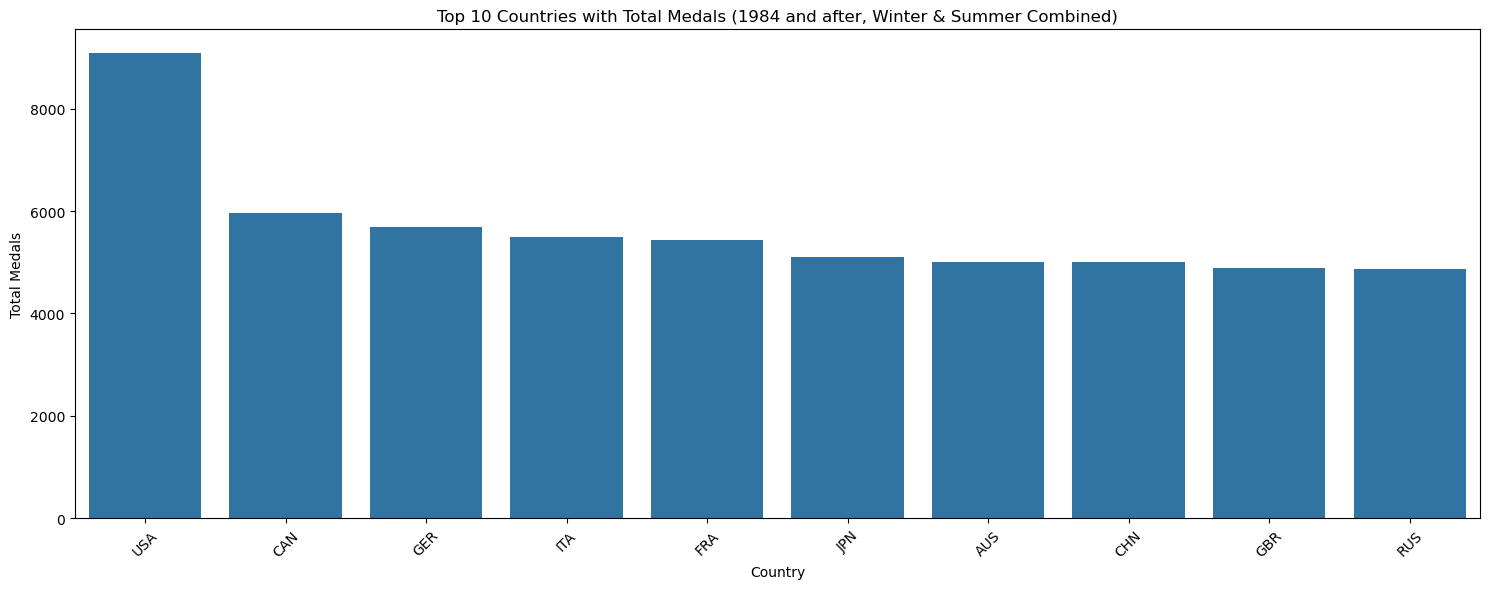

In [100]:
# 1. 1984년 이후 데이터 필터링 (하계 및 동계 올림픽 합산)
medal_data_1984 = all_data[all_data['Year'] >= 1984]

# 2. 국가별 메달 수 계산 (하계 및 동계 합산)
medal_count_1984 = medal_data_1984.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count_1984['Total'] = medal_count_1984.sum(axis=1)
medal_count_1984 = medal_count_1984.sort_values(by='Total', ascending=False)

# 3. 상위 10개 국가 선택
top_10_medal_count_1984 = medal_count_1984.head(10)

# 4. 1984년 이후 Top 10 국가별 메달 수 시각화 (막대 그래프)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_medal_count_1984.index, y=top_10_medal_count_1984['Total'], width=0.8)
plt.title("Top 10 Countries with Total Medals (1984 and after, Winter & Summer Combined)")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

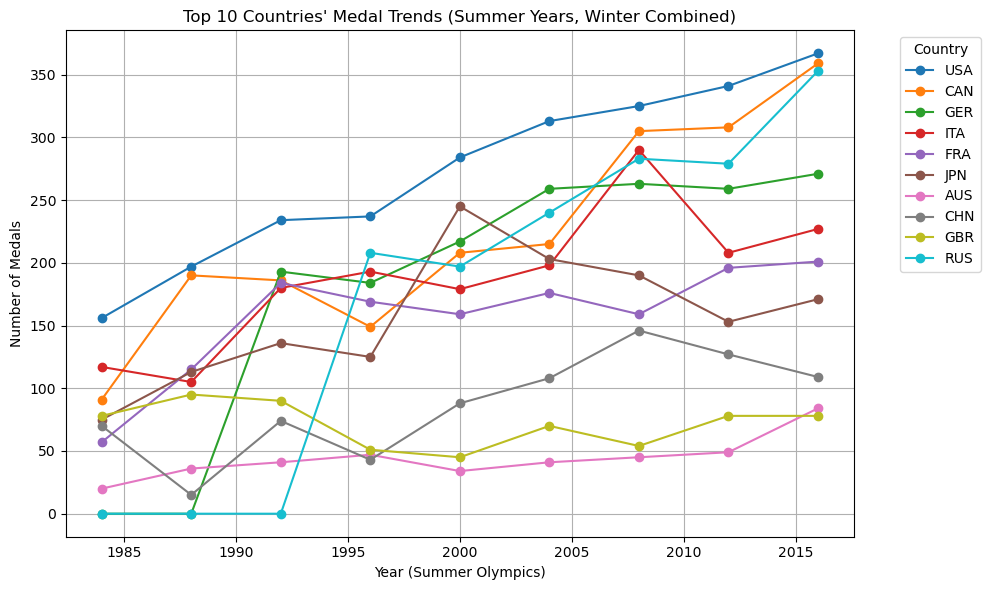

In [101]:
# 1. 1984년 이후 데이터 필터링
medal_data_1984 = all_data[all_data['Year'] >= 1984]

# 2. 동계와 하계 데이터를 분리
summer_olympics = medal_data_1984[medal_data_1984['Season'] == 'Summer'].copy()
winter_olympics = medal_data_1984[medal_data_1984['Season'] == 'Winter'].copy()

# 3. 동계 올림픽의 메달 수를 다음 하계 올림픽 해에 합산
# 하계올림픽 연도 리스트: 2016, 2012, 2008, 2004, 2000, 1996 (1992년까지는 동계 하계 같이)
summer_years = [1996, 2000, 2004, 2008, 2012, 2016]
winter_to_summer_mapping = {1994: 1996, 1998: 2000, 2002: 2004, 2006: 2008, 2010: 2012, 2014: 2016}

# 4. 동계 메달 수를 하계 해로 매핑하여 합산
winter_olympics['Mapped_Year'] = winter_olympics['Year'].replace(winter_to_summer_mapping)

# 5. 국가별 하계 및 동계 메달 수 합산 (하계 기준)
summer_combined = pd.concat([summer_olympics, winter_olympics])
medal_trend_combined = summer_combined.pivot_table(index='Mapped_Year', columns='NOC', values='Medal', aggfunc='size', fill_value=0)

# 6. 상위 10개 국가 선택
medal_count_1984 = summer_combined.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count_1984['Total'] = medal_count_1984.sum(axis=1)
medal_count_1984 = medal_count_1984.sort_values(by='Total', ascending=False)
top_10_countries = medal_count_1984.head(10).index

# 7. 하계 올림픽 해 기준으로 동계와 합산한 국가별 메달 수 추이 시각화 (라인 그래프)
plt.figure(figsize=(10, 6))
for country in top_10_countries:
    if country in medal_trend_combined.columns:
        plt.plot(medal_trend_combined.index, medal_trend_combined[country], marker='o', label=country)

plt.title("Top 10 Countries' Medal Trends (Summer Years, Winter Combined)")
plt.xlabel("Year (Summer Olympics)")
plt.ylabel("Number of Medals")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()